# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis & Feature Engineering

### Target column

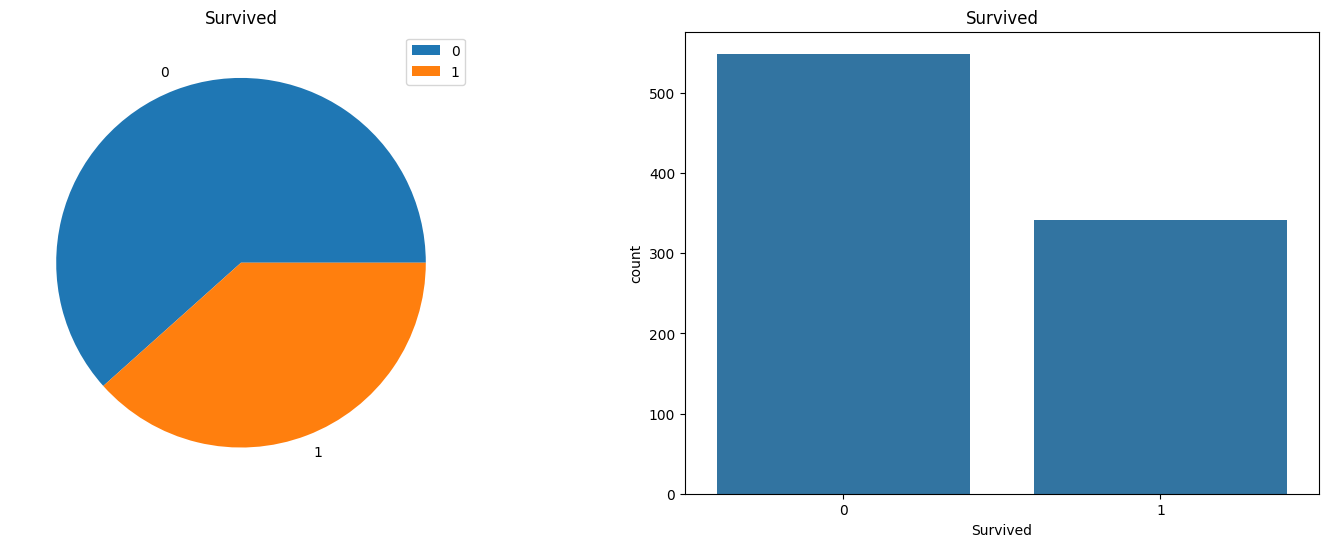

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

df['Survived'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
ax[0].legend()

sns.countplot(data=df, x = 'Survived', ax=ax[1])
ax[1].set_title('Survived')

plt.show()

38.38% of people survived!

### Sex [Categorical feature]

In [7]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

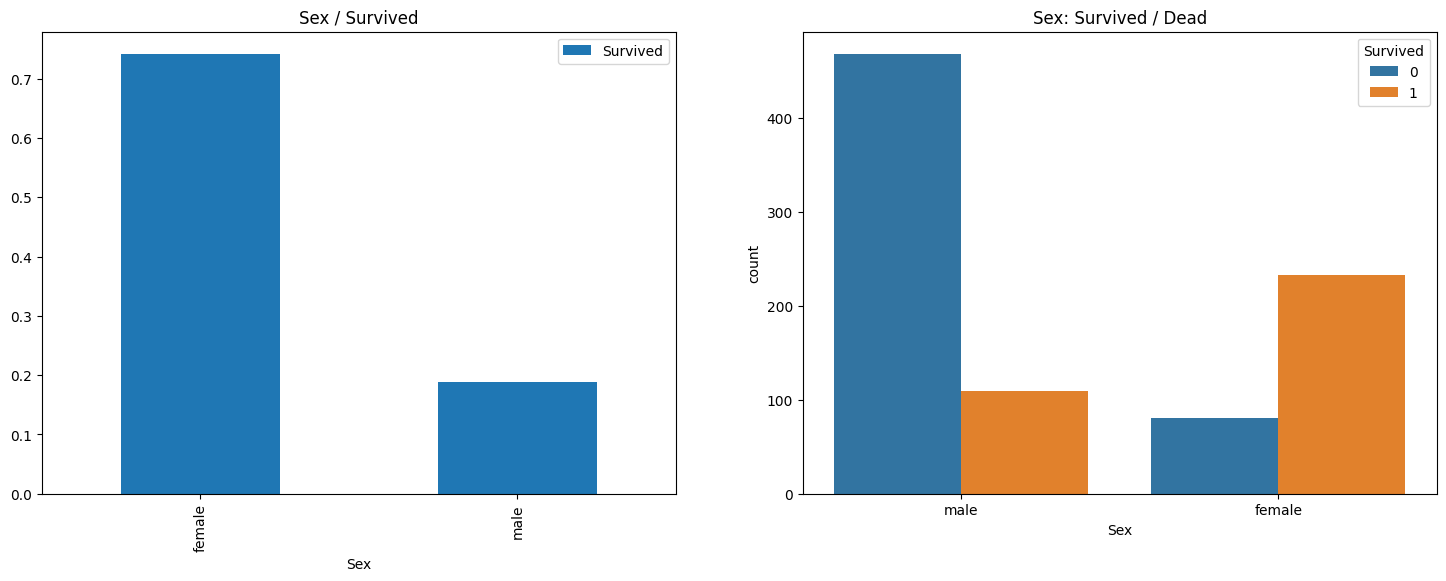

In [8]:
f,ax = plt.subplots(1, 2, figsize=(18, 6))

df[['Survived', 'Sex']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex / Survived')

sns.countplot(x='Sex', hue='Survived',data=df, ax=ax[1])
ax[1].set_title("Sex: Survived / Dead")

plt.show()

### PClass [Ordinal Feature]

In [9]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


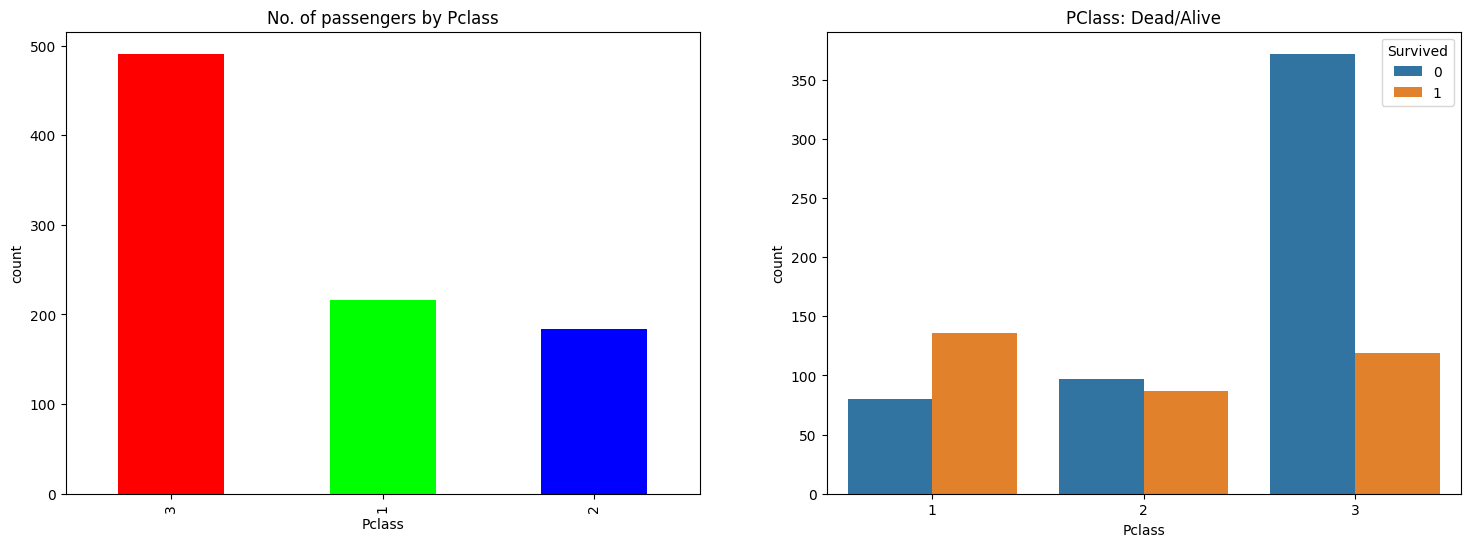

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

df['Pclass'].value_counts().plot.bar(ax=ax[0], color=["#ff0000", '#00ff00', '#0000ff'])
ax[0].set_title("No. of passengers by Pclass")
ax[0].set_ylabel("count")

sns.countplot(x='Pclass', data=df, hue='Survived', ax=ax[1])
ax[1].set_title("PClass: Dead/Alive")

plt.show()

In [12]:
pd.crosstab([df['Survived'], df['Pclass']], df['Sex'], margins=True)

Sex              female  male  All
Survived Pclass                   
0        1            3    77   80
         2            6    91   97
         3           72   300  372
1        1           91    45  136
         2           70    17   87
         3           72    47  119
All                 314   577  891

### Age [Continuous Feature]

In [13]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


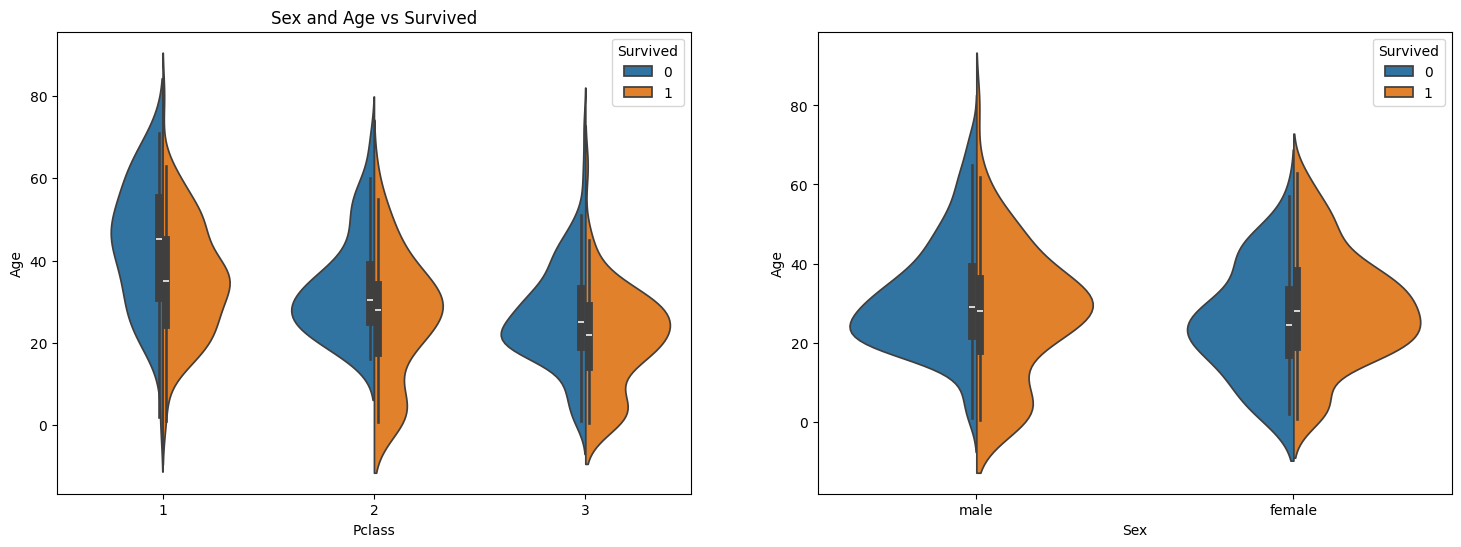

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=df, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")

sns.violinplot(x="Sex", y="Age", hue="Survived", split=True, data=df, ax=ax[1])
ax[0].set_title("Sex and Age vs Survived")

plt.show()

#### Age imputation

In [15]:
df['Age'].isnull().sum()

177

In [16]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [17]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(df['Sex'], df['Initial'])

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
df['Initial'].value_counts()

Initial
Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: count, dtype: int64

In [21]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
df.loc[((df['Age'].isnull()) & (df['Initial'] == 'Mr')), 'Age'] = 33
df.loc[((df['Age'].isnull()) & (df['Initial'] == 'Mrs')), 'Age'] = 36
df.loc[((df['Age'].isnull()) & (df['Initial'] == 'Master')), 'Age'] = 5
df.loc[((df['Age'].isnull()) & (df['Initial'] == 'Miss')), 'Age'] = 22
df.loc[((df['Age'].isnull()) & (df['Initial'] == 'Other')), 'Age'] = 46

In [23]:
df['Age'].isnull().sum()

0

### Embarked [Categorical Feature]

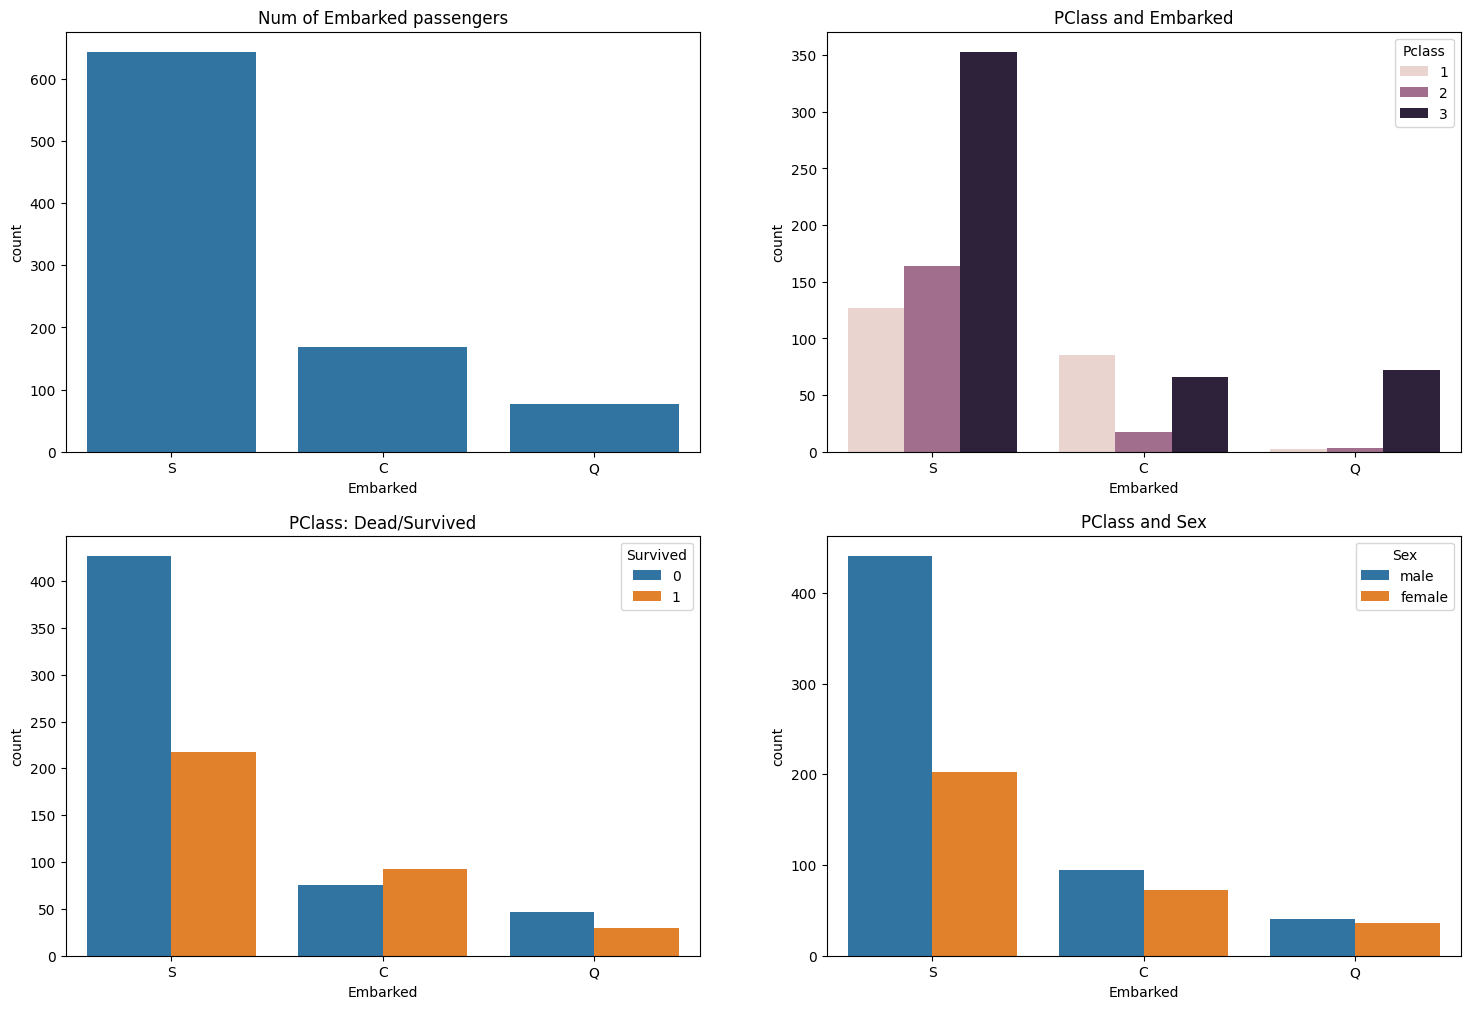

In [26]:
f,ax=plt.subplots(2, 2, figsize=(18, 12))

sns.countplot(x="Embarked", data=df, ax=ax[0,0])
ax[0,0].set_title("Num of Embarked passengers")

sns.countplot(x="Embarked", hue="Pclass", data=df, ax=ax[0,1])
ax[0,1].set_title("PClass and Embarked")

sns.countplot(x="Embarked", hue="Survived", data=df, ax=ax[1,0])
ax[1,0].set_title("PClass: Dead/Survived")

sns.countplot(x="Embarked", hue="Sex", data=df, ax=ax[1, 1])
ax[1,1].set_title("PClass and Sex")

plt.show()

In [27]:
df['Embarked'].isnull().sum()

2

In [30]:
df['Embarked'].fillna('S', inplace=True)

In [31]:
df['Embarked'].isnull().sum()

0

### SibSp [Categorical Feature]

In [33]:
pd.crosstab([df['SibSp']], df['Survived'], margins = True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


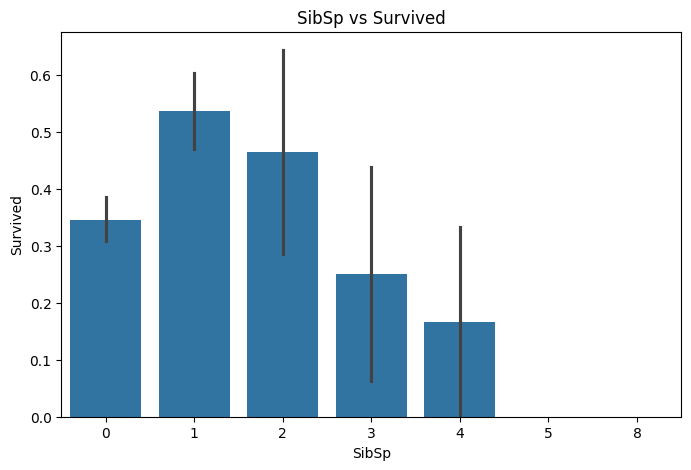

In [47]:
f,ax=plt.subplots(1,1, figsize=(8, 5))

sns.barplot(x="SibSp", y = 'Survived', data=df, ax=ax)
ax.set_title("SibSp vs Survived")

plt.show()

### Parch

In [48]:
pd.crosstab(df['Parch'], df['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


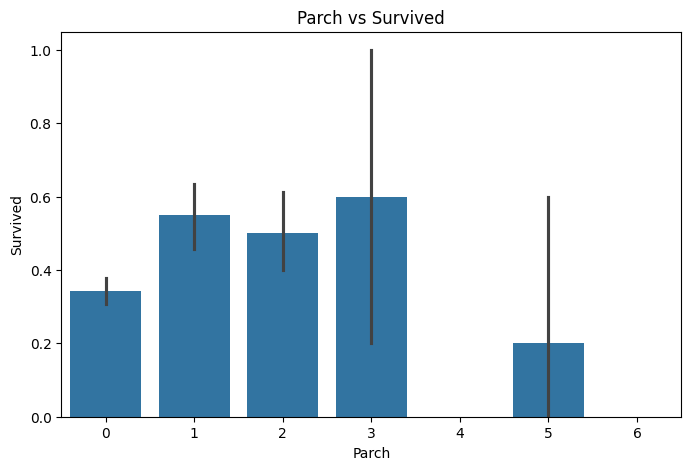

In [52]:
f,ax=plt.subplots(1,1, figsize=(8, 5))

sns.barplot(x="Parch", y = 'Survived', data=df, ax=ax)
ax.set_title("Parch vs Survived")

plt.show()

### Combining SibSp and Parch

In [53]:
df['FamilySize'] = 0
df['FamilySize'] = df['Parch'] + df['SibSp']

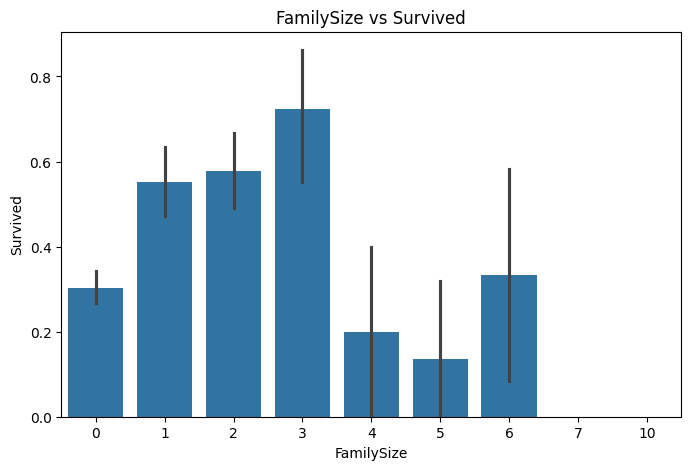

In [54]:
f,ax=plt.subplots(1,1, figsize=(8, 5))

sns.barplot(x="FamilySize", y = 'Survived', data=df, ax=ax)
ax.set_title("FamilySize vs Survived")

plt.show()

### Fare [Continuous Feature]

In [57]:
print('Highest fare:',df['Fare'].max())
print('Lowest fare:',df['Fare'].min())
print('Average fare:',df['Fare'].mean())

Highest fare: 512.3292
Lowest fare: 0.0
Average fare: 32.204207968574636


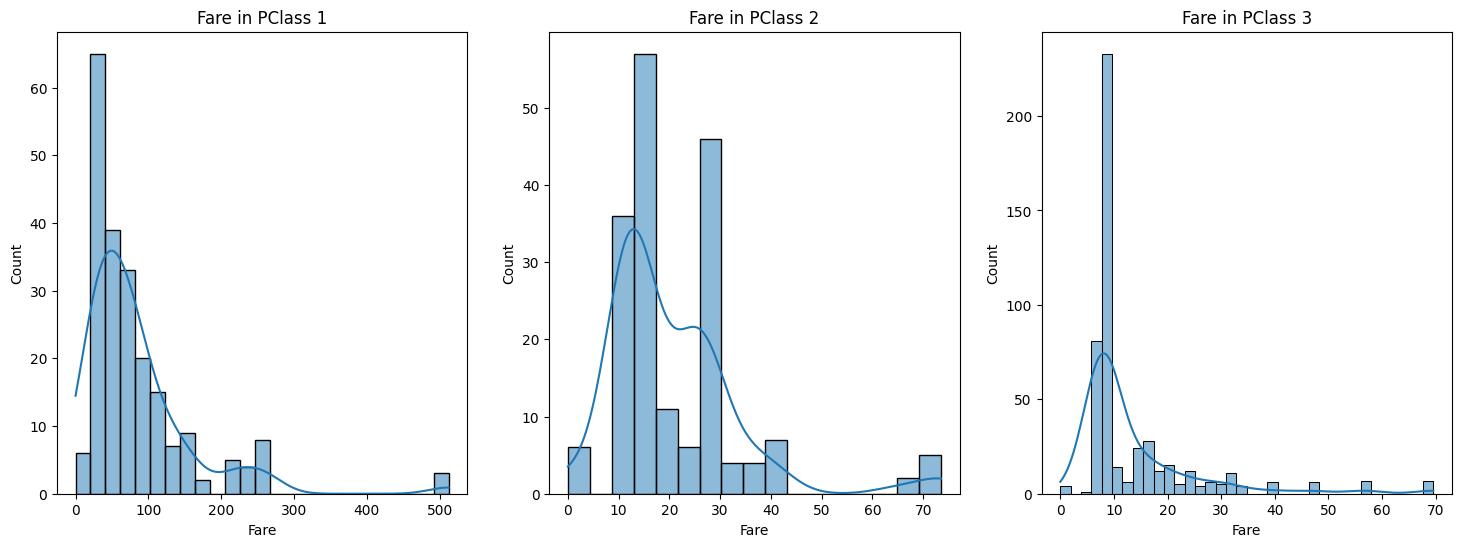

In [74]:
f,ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df[df['Pclass'] == 1]['Fare'], kde=True, ax=ax[0])
ax[0].set_title("Fare in PClass 1")

sns.histplot(df[df['Pclass'] == 2]['Fare'], kde=True, ax=ax[1])
ax[1].set_title("Fare in PClass 2")

sns.histplot(df[df['Pclass'] == 3]['Fare'], kde=True, ax=ax[2])
ax[2].set_title("Fare in PClass 3")

plt.show()

## Final Steps

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [94]:
df = pd.get_dummies(data=df, columns=['Sex', 'Embarked', 'Initial'], dtype='int')

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,1,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,0,0,0,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,1,0,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,1,0,0,1,0,0,1,0,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Cabin           204 non-null    object 
 10  FamilySize      891 non-null    int64  
 11  Sex_female      891 non-null    int64  
 12  Sex_male        891 non-null    int64  
 13  Embarked_C      891 non-null    int64  
 14  Embarked_Q      891 non-null    int64  
 15  Embarked_S      891 non-null    int64  
 16  Initial_Master  891 non-null    int64  
 17  Initial_Miss    891 non-null    int

In [100]:
df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0


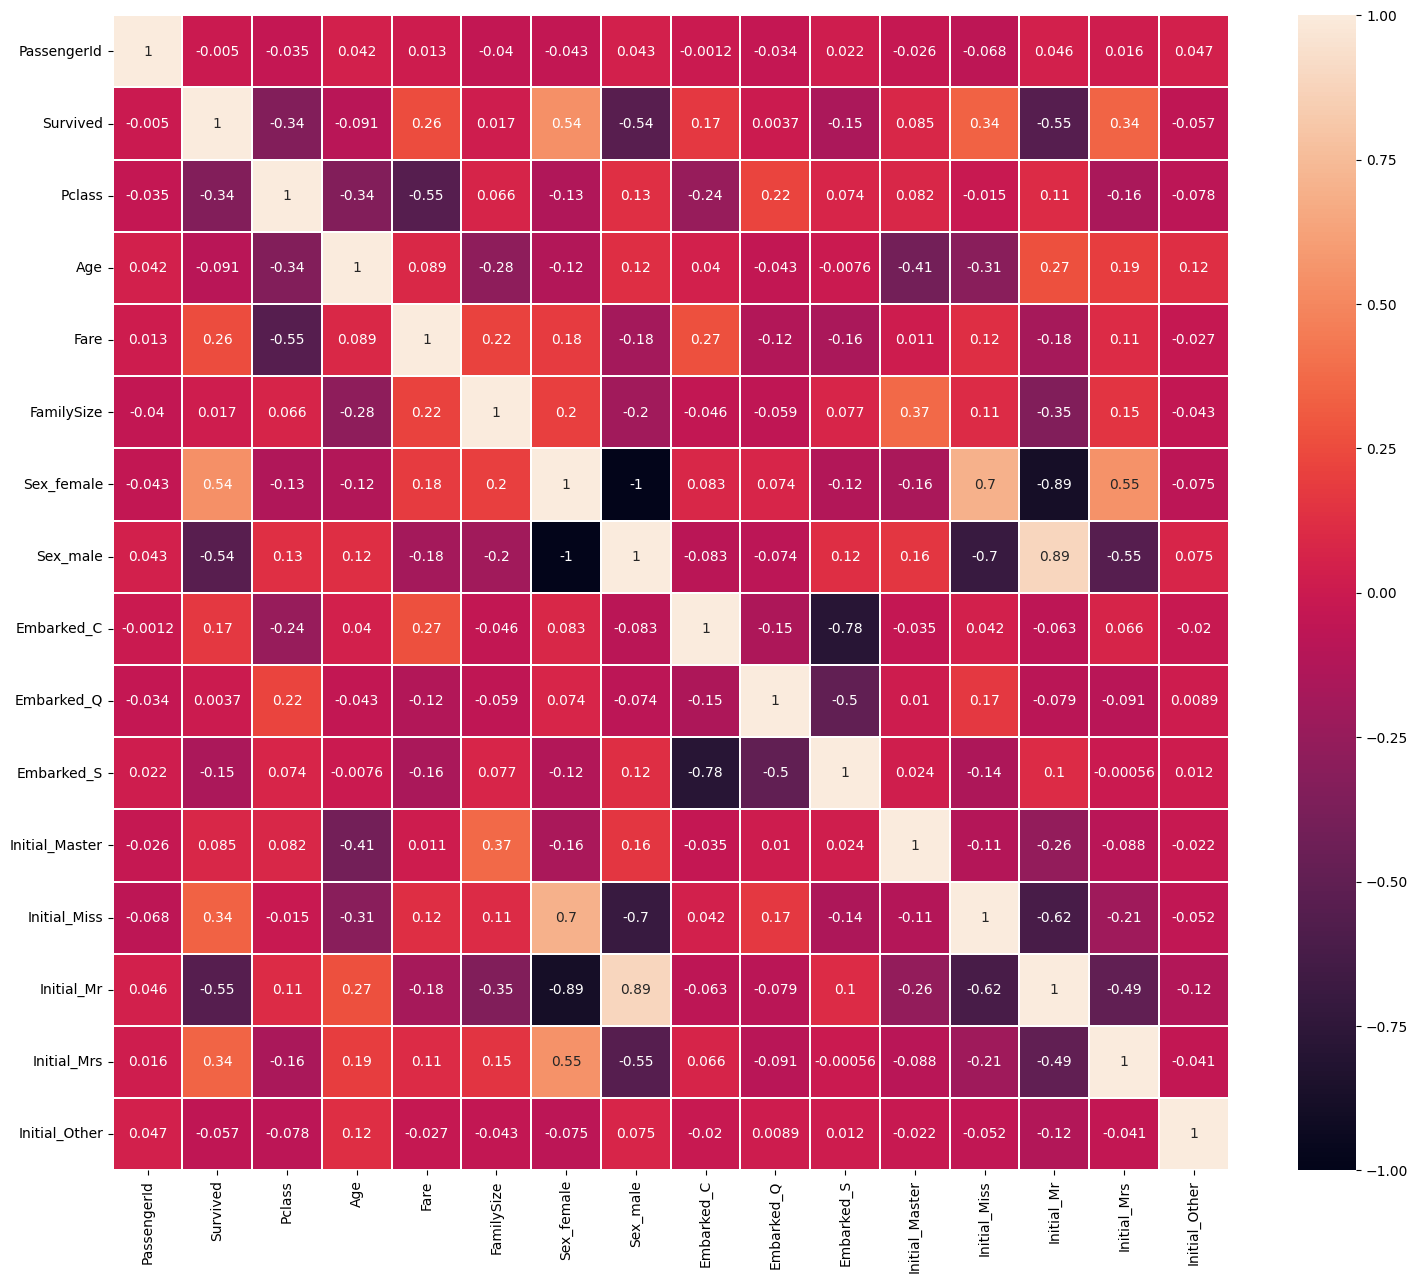

In [108]:
graph = sns.heatmap(df.corr(), annot=True, linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(18,15)

In [110]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,0
3,4,1,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,1,0
4,5,0,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0


In [113]:
!ls ../datasets

gender_submission.csv  test.csv  train.csv


In [114]:
df.to_csv('../datasets/train_final.csv')

In [115]:
!ls ../datasets

gender_submission.csv  test.csv  train.csv  train_final.csv


## Done!